Motor Vehicle Collisions - Crashes -- https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option("display.max_rows", None)
pd.pandas.set_option("display.max_columns", None)

In [2]:
# libraries for the files in google drive
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


file_id = '1JS-eSdYjfhpfNmxTnNfXRP9EB8kyIxAx' #<-- You add in here the id from you google drive file, you can find it


download = drive.CreateFile({'id': file_id})


# Download the file to a local disc
download.GetContentFile('data.csv')
df  = pd.read_csv("data.csv")
df.head()


<ipython-input-2-54873fe2b473>:22: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df  = pd.read_csv("data.csv")


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2.0,0.0,0,0,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1.0,0.0,0,0,0,0,1,0,Pavement Slippery,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,0.0,0.0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,0.0,0.0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1970998 entries, 0 to 1970997
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

Lets look at the datatype and columns at a glance.

In [4]:
df.describe(include='all')

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
count,1970998,1970998,1358302,1358066.0,1.745038e+06,1.745038e+06,1745038,1559482,1240110,319145,1.970980e+06,1.970967e+06,1.970998e+06,1.970998e+06,1.970998e+06,1.970998e+06,1.970998e+06,1.970998e+06,1964922,1673515,138663,30943,8319,1.970998e+06,1958994,1609299,133980,29933,8075
unique,3887,1440,5,425.0,NaN,NaN,266251,17602,19831,206125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61,61,51,40,29,NaN,1480,1655,233,93,63
top,01/21/2014,16:00,BROOKLYN,11207.0,NaN,NaN,"(0.0, 0.0)",BROADWAY,3 AVENUE,772 EDGEWATER ROAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,Sedan,Sedan,Sedan,Sedan,Sedan
freq,1161,27490,429832,19017.0,NaN,NaN,4114,17277,9843,402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,681653,1409041,129271,29202,7846,NaN,529073,376132,40190,9623,2686
mean,NaN,NaN,NaN,NaN,4.062822e+01,-7.375325e+01,NaN,NaN,NaN,NaN,2.961928e-01,1.412505e-03,5.448407e-02,7.174031e-04,2.542468e-02,1.045156e-04,2.137273e-01,5.733136e-04,NaN,NaN,NaN,NaN,NaN,3.080145e+06,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.976612e+00,3.723341e+00,NaN,NaN,NaN,NaN,6.872277e-01,3.959537e-02,2.398622e-01,2.728161e-02,1.592983e-01,1.027226e-02,6.483791e-01,2.608726e-02,NaN,NaN,NaN,NaN,NaN,1.503299e+06,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,-2.013600e+02,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,2.200000e+01,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.066798e+01,-7.397499e+01,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,3.128869e+06,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,4.072123e+01,-7.392738e+01,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,3.621706e+06,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,4.076944e+01,-7.386660e+01,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,4.114710e+06,NaN,NaN,NaN,NaN,NaN


In [5]:
df= df[df['CONTRIBUTING FACTOR VEHICLE 1'].notna()]
dfspecified= df[df['CONTRIBUTING FACTOR VEHICLE 1'] !='Unspecified']
dfspecified.shape

(1283269, 29)

To have look at the Missing values

In [6]:
dfspecified = dfspecified[dfspecified['CONTRIBUTING FACTOR VEHICLE 1'].notna()]
dfspecified = pd.DataFrame(dfspecified[dfspecified['LONGITUDE'].notna()])
dfspecified = dfspecified[dfspecified['BOROUGH'].notna()]
dfspecified = dfspecified[dfspecified['ON STREET NAME'].notna()]
#dfspecified.to_csv('output.csv', index= False)

# Compute the mean and standard deviation of the latitude column
print("Mean latitude:", dfspecified['LATITUDE'].mean())
print("Standard deviation latitude:", dfspecified['LATITUDE'].std())

# Compute the count and percentage of accidents in each borough
borough_counts = dfspecified['BOROUGH'].value_counts()
print(borough_counts)
borough_percentages = dfspecified['BOROUGH'].value_counts(normalize=True) * 100
print(borough_percentages)


Mean latitude: 40.6300071121448
Standard deviation latitude: 1.9518718511052031
QUEENS           176991
BROOKLYN         174844
MANHATTAN        159490
BRONX             80631
STATEN ISLAND     26556
Name: BOROUGH, dtype: int64
QUEENS           28.615613
BROOKLYN         28.268490
MANHATTAN        25.786080
BRONX            13.036287
STATEN ISLAND     4.293530
Name: BOROUGH, dtype: float64


In [7]:
# Convert the CRASH DATE column to a datetime object
dfspecified['CRASH DATE'] = pd.to_datetime(dfspecified['CRASH DATE'])

# Create a new column with the day of the week
dfspecified['DAY OF WEEK'] = dfspecified['CRASH DATE'].dt.day_name()

# Compute the number of accidents per day of the week
day_counts = dfspecified['DAY OF WEEK'].value_counts()
print(day_counts)


Friday       99467
Thursday     93290
Tuesday      91826
Wednesday    91395
Monday       88548
Saturday     81840
Sunday       72146
Name: DAY OF WEEK, dtype: int64


In [8]:
dfspecified.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,DAY OF WEEK
9,2021-12-14,14:58,MANHATTAN,10017.0,40.751440,-73.973970,"(40.75144, -73.97397)",3 AVENUE,EAST 43 STREET,NaN,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,Unspecified,NaN,NaN,NaN,4486519,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,Tuesday
11,2021-12-14,16:50,QUEENS,11413.0,40.675884,-73.755770,"(40.675884, -73.75577)",SPRINGFIELD BOULEVARD,EAST GATE PLAZA,NaN,0.0,0.0,0,0,0,0,0,0,Turning Improperly,Unspecified,NaN,NaN,NaN,4487127,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,Tuesday
14,2021-12-14,23:10,QUEENS,11434.0,40.666840,-73.789410,"(40.66684, -73.78941)",NORTH CONDUIT AVENUE,150 STREET,NaN,2.0,0.0,0,0,0,0,2,0,Reaction to Uninvolved Vehicle,Unspecified,NaN,NaN,NaN,4486635,Sedan,Sedan,NaN,NaN,NaN,Tuesday
28,2021-12-14,17:15,BROOKLYN,11211.0,40.710957,-73.951126,"(40.710957, -73.951126)",GRAND STREET,UNION AVENUE,NaN,1.0,0.0,0,0,0,0,1,0,Passing or Lane Usage Improper,Unspecified,NaN,NaN,NaN,4486556,Bus,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,Tuesday
45,2022-04-24,21:40,BRONX,10452.0,40.843906,-73.924130,"(40.843906, -73.92413)",BOSCOBEL PLACE,UNIVERSITY AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Alcohol Involvement,Unspecified,NaN,NaN,NaN,4522156,Taxi,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,Sunday


In [9]:
dfspecified = dfspecified[dfspecified['CROSS STREET NAME'].notna()]

dfspecified = dfspecified[dfspecified['CONTRIBUTING FACTOR VEHICLE 2'].notna()]

dfspecified = dfspecified[dfspecified['VEHICLE TYPE CODE 1'].notna()]

dfspecified = dfspecified[dfspecified['VEHICLE TYPE CODE 2'].notna()]

dfspecified.loc['NUMBER OF PERSONS INJURED'] = dfspecified['NUMBER OF PERSONS INJURED'].fillna(0)

dfspecified.loc['NUMBER OF PERSONS KILLED'] = dfspecified['NUMBER OF PERSONS KILLED'].fillna(0)


# Check the updated DataFrame
dfspecified.isnull().sum()

CRASH DATE                            2
CRASH TIME                            2
BOROUGH                               2
ZIP CODE                             93
LATITUDE                              2
LONGITUDE                             2
LOCATION                              2
ON STREET NAME                        2
CROSS STREET NAME                     2
OFF STREET NAME                  529725
NUMBER OF PERSONS INJURED             2
NUMBER OF PERSONS KILLED              3
NUMBER OF PEDESTRIANS INJURED         2
NUMBER OF PEDESTRIANS KILLED          2
NUMBER OF CYCLIST INJURED             2
NUMBER OF CYCLIST KILLED              2
NUMBER OF MOTORIST INJURED            2
NUMBER OF MOTORIST KILLED             2
CONTRIBUTING FACTOR VEHICLE 1         2
CONTRIBUTING FACTOR VEHICLE 2         2
CONTRIBUTING FACTOR VEHICLE 3    489229
CONTRIBUTING FACTOR VEHICLE 4    520330
CONTRIBUTING FACTOR VEHICLE 5    527030
COLLISION_ID                          2
VEHICLE TYPE CODE 1                   2


In [10]:
dfspecified.dropna(subset=['CONTRIBUTING FACTOR VEHICLE 1'], inplace=True)
dfspecified.dropna(subset=['CONTRIBUTING FACTOR VEHICLE 2'], inplace=True)

In [11]:
dfspecified['INJURY_SEVERITY'] = dfspecified['NUMBER OF PERSONS INJURED'] + dfspecified['NUMBER OF PERSONS KILLED'] * 10

In [12]:
def categorize_injury_severity(injury_severity):
    if injury_severity == 0:
        return 'No Injury'
    elif 0 < injury_severity <= 2:
        return 'Mild Injury'
    elif 2 < injury_severity <= 4:
        return 'Moderate Injury'
    elif 4 < injury_severity <= 6:
        return 'Severe Injury'
    else:
        return 'Fatal'

# Assuming you have already created the 'INJURY_SEVERITY' column
dfspecified['INJURY_CATEGORY'] = dfspecified['INJURY_SEVERITY'].apply(categorize_injury_severity)

In [13]:
dfspecified['CRASH TIME'] = pd.to_datetime(dfspecified['CRASH TIME'])

# Extract the hour, minute, and second values from CRASH TIME
hour = dfspecified['CRASH TIME'].dt.hour
minute = dfspecified['CRASH TIME'].dt.minute
second = dfspecified['CRASH TIME'].dt.second

# Calculate total number of seconds since midnight
seconds_since_midnight = hour*3600 + minute*60 + second

# Add the new column to the DataFrame
dfspecified['SECONDS_SINCE_MIDNIGHT'] = seconds_since_midnight


In [15]:
# Count the occurrences of each contributing factor across all boroughs
factor_counts = dfspecified.groupby('CONTRIBUTING FACTOR VEHICLE 1').size().reset_index(name='counts')
most_common_factor = factor_counts.sort_values('counts', ascending=False).iloc[0]['CONTRIBUTING FACTOR VEHICLE 1']
print("The most common contributing factor to car accidents in NYC is:", most_common_factor)

# Count the occurrences of each contributing factor by borough
borough_factor_counts = dfspecified.groupby(['BOROUGH', 'CONTRIBUTING FACTOR VEHICLE 1']).size().reset_index(name='counts')
borough_most_common_factor = borough_factor_counts[borough_factor_counts['CONTRIBUTING FACTOR VEHICLE 1'] == most_common_factor]
print("\nMost common contributing factor by borough:\n", borough_most_common_factor)

The most common contributing factor to car accidents in NYC is: Driver Inattention/Distraction

Most common contributing factor by borough:
            BOROUGH   CONTRIBUTING FACTOR VEHICLE 1  counts
10           BRONX  Driver Inattention/Distraction   18451
69        BROOKLYN  Driver Inattention/Distraction   41332
127      MANHATTAN  Driver Inattention/Distraction   40959
185         QUEENS  Driver Inattention/Distraction   49084
243  STATEN ISLAND  Driver Inattention/Distraction    6901


In [16]:
def standardize_street_name(name):
    # Convert to uppercase and strip leading/trailing whitespaces
    if not isinstance(name, str):
      return name
    name = name.upper().strip()

    # Replace common abbreviations
    name = name.replace(' ST.', ' STREET')
    name = name.replace(' AVE.', ' AVENUE')
    name = name.replace(' BLVD.', ' BOULEVARD')
    name = name.replace(' RD.', ' ROAD')
    name = name.replace(' PL.', ' PLACE')
    name = name.replace(' PKWY.', ' PARKWAY')
    name = name.replace(' DR.', ' DRIVE')
    name = name.replace(' LN.', ' LANE')
    name = name.replace(' CT.', ' COURT')
    # Add more replacements as needed
    
    return name

# Apply the standardize_street_name function to the 'ON STREET NAME' column
dfspecified['ON STREET NAME'] = dfspecified['ON STREET NAME'].apply(standardize_street_name)
dfspecified['CROSS STREET NAME'] = dfspecified['CROSS STREET NAME'].apply(standardize_street_name)


In [17]:
dfspecified['CRASH DATE'] = pd.to_datetime(dfspecified['CRASH DATE'])
dfspecified['DAY_OF_WEEK'] = dfspecified['CRASH DATE'].dt.dayofweek

In [18]:
def get_season(date):
    month = date.month
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

dfspecified['SEASON'] = dfspecified['CRASH DATE'].apply(get_season)

In [19]:
dfspecified['CONTRIBUTING FACTOR VEHICLE 1'] = dfspecified['CONTRIBUTING FACTOR VEHICLE 1'].apply(lambda x: "Cell Phone" if "Cell Phone" in x else x)
dfspecified['CONTRIBUTING FACTOR VEHICLE 1'] = dfspecified['CONTRIBUTING FACTOR VEHICLE 1'].apply(lambda x: "Drugs" if "Drugs" in x else x)
dfspecified['CONTRIBUTING FACTOR VEHICLE 1'] = dfspecified['CONTRIBUTING FACTOR VEHICLE 1'].apply(lambda x: "Illness" if "Illnes" in x else x)
dfspecified['CONTRIBUTING FACTOR VEHICLE 1'] = dfspecified['CONTRIBUTING FACTOR VEHICLE 1'].apply(lambda x: "Cell Phone" if "Texting" in x else x)
dfspecified['CONTRIBUTING FACTOR VEHICLE 1'] = dfspecified['CONTRIBUTING FACTOR VEHICLE 1'].apply(lambda x: "Reaction to Uninvolved Vehicle" if "Reaction to" in x else x)
dfspecified['CONTRIBUTING FACTOR VEHICLE 1'] = dfspecified['CONTRIBUTING FACTOR VEHICLE 1'].apply(lambda x: "Pavement Issues" if "Pavement" in x else x)


dfspecified['CONTRIBUTING FACTOR VEHICLE 2'] = dfspecified['CONTRIBUTING FACTOR VEHICLE 2'].apply(lambda x: "Cell Phone" if "Cell Phone" in x else x)
dfspecified['CONTRIBUTING FACTOR VEHICLE 2'] = dfspecified['CONTRIBUTING FACTOR VEHICLE 2'].apply(lambda x: "Drugs" if "Drugs" in x else x)
dfspecified['CONTRIBUTING FACTOR VEHICLE 2'] = dfspecified['CONTRIBUTING FACTOR VEHICLE 2'].apply(lambda x: "Illness" if "Illnes" in x else x)
dfspecified['CONTRIBUTING FACTOR VEHICLE 2'] = dfspecified['CONTRIBUTING FACTOR VEHICLE 2'].apply(lambda x: "Cell Phone" if "Texting" in x else x)
dfspecified['CONTRIBUTING FACTOR VEHICLE 2'] = dfspecified['CONTRIBUTING FACTOR VEHICLE 2'].apply(lambda x: "Reaction to Uninvolved Vehicle" if "Reaction to" in x else x)
dfspecified['CONTRIBUTING FACTOR VEHICLE 2'] = dfspecified['CONTRIBUTING FACTOR VEHICLE 2'].apply(lambda x: "Pavement Issues" if "Pavement" in x else x)

In [20]:
# Group the data by location (intersections) and calculate the accident frequency
accident_frequency = dfspecified.groupby(['ON STREET NAME', 'CROSS STREET NAME']).size().reset_index(name='ACCIDENT_COUNT')

# Sort the data by accident frequency in descending order
accident_frequency_sorted = accident_frequency.sort_values('ACCIDENT_COUNT', ascending=False)

# Display the accident frequency by location
accident_frequency_sorted.head()

# Merge the accident_frequency_sorted back to the original DataFrame
dfspecified = dfspecified.merge(accident_frequency_sorted, on=['ON STREET NAME', 'CROSS STREET NAME'], how='left')

In [21]:
dfspecified.shape

(529723, 36)

In [22]:
dfspecified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 529723 entries, 0 to 529722
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   CRASH DATE                     529723 non-null  datetime64[ns]
 1   CRASH TIME                     529723 non-null  datetime64[ns]
 2   BOROUGH                        529723 non-null  object        
 3   ZIP CODE                       529632 non-null  object        
 4   LATITUDE                       529723 non-null  float64       
 5   LONGITUDE                      529723 non-null  float64       
 6   LOCATION                       529723 non-null  object        
 7   ON STREET NAME                 529723 non-null  object        
 8   CROSS STREET NAME              529723 non-null  object        
 9   OFF STREET NAME                0 non-null       object        
 10  NUMBER OF PERSONS INJURED      529722 non-null  float64       
 11  

In [23]:
dfspecified.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,DAY OF WEEK,INJURY_SEVERITY,INJURY_CATEGORY,SECONDS_SINCE_MIDNIGHT,DAY_OF_WEEK,SEASON,ACCIDENT_COUNT
0,2021-12-14,2023-05-10 14:58:00,MANHATTAN,10017.0,40.751440,-73.973970,"(40.75144, -73.97397)",3 AVENUE,EAST 43 STREET,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Passing Too Closely,Unspecified,NaN,NaN,NaN,4486519.0,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,Tuesday,0.0,No Injury,53880,1,Winter,26
1,2021-12-14,2023-05-10 16:50:00,QUEENS,11413.0,40.675884,-73.755770,"(40.675884, -73.75577)",SPRINGFIELD BOULEVARD,EAST GATE PLAZA,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Turning Improperly,Unspecified,NaN,NaN,NaN,4487127.0,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,Tuesday,0.0,No Injury,60600,1,Winter,26
2,2021-12-14,2023-05-10 23:10:00,QUEENS,11434.0,40.666840,-73.789410,"(40.66684, -73.78941)",NORTH CONDUIT AVENUE,150 STREET,NaN,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Reaction to Uninvolved Vehicle,Unspecified,NaN,NaN,NaN,4486635.0,Sedan,Sedan,NaN,NaN,NaN,Tuesday,2.0,Mild Injury,83400,1,Winter,64
3,2021-12-14,2023-05-10 17:15:00,BROOKLYN,11211.0,40.710957,-73.951126,"(40.710957, -73.951126)",GRAND STREET,UNION AVENUE,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Passing or Lane Usage Improper,Unspecified,NaN,NaN,NaN,4486556.0,Bus,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,Tuesday,1.0,Mild Injury,62100,1,Winter,35
4,2022-04-24,2023-05-10 21:40:00,BRONX,10452.0,40.843906,-73.924130,"(40.843906, -73.92413)",BOSCOBEL PLACE,UNIVERSITY AVENUE,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Alcohol Involvement,Unspecified,NaN,NaN,NaN,4522156.0,Taxi,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,Sunday,0.0,No Injury,78000,6,Spring,15


<ipython-input-24-cb9b0c804d0e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dfspecified.corr()


<Axes: >

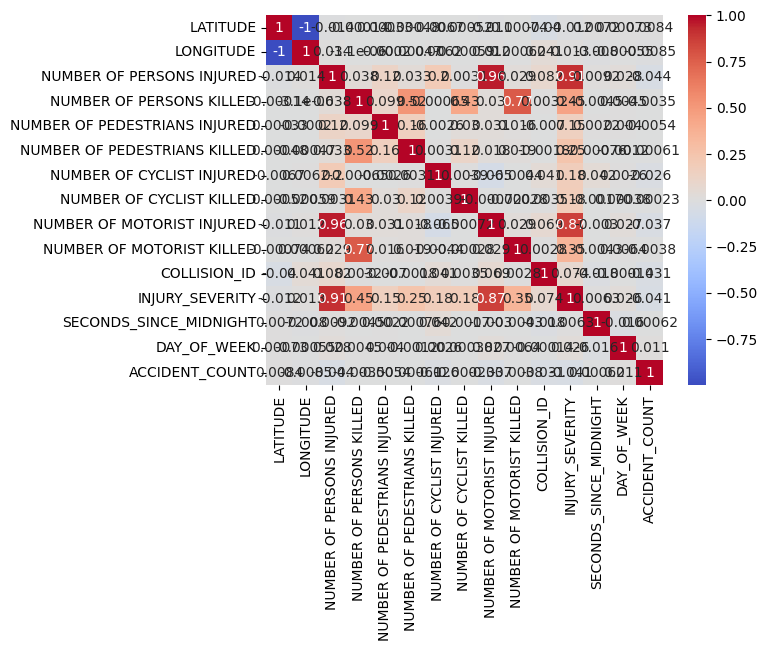

In [24]:
# Compute the correlation matrix
corr = dfspecified.corr()

# Plot a heatmap of the correlation matrix
import seaborn as sns
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [25]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(dfspecified['CONTRIBUTING FACTOR VEHICLE 1'], dfspecified['CONTRIBUTING FACTOR VEHICLE 2'])

# Perform chi-squared test
chi2, p, dof, ex = chi2_contingency(contingency_table)

# Calculate Cramér's V
n = contingency_table.sum().sum()
cramer_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print(f"Cramér's V: {cramer_v}")


Cramér's V: 0.22438537008170195


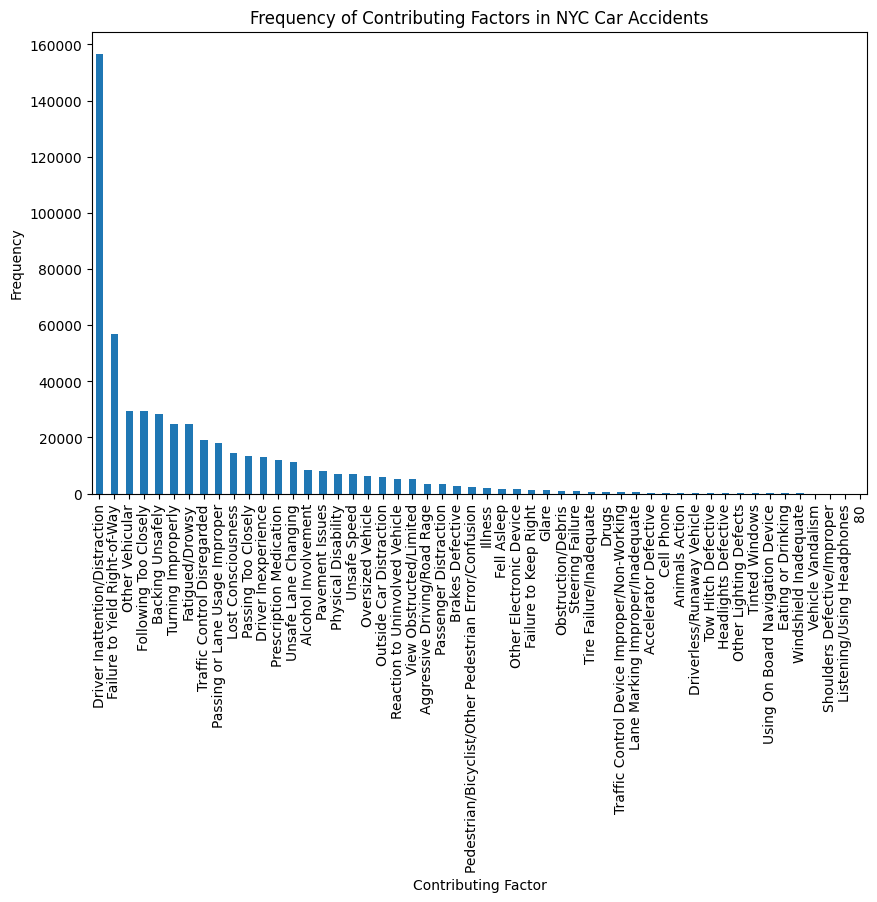

In [26]:
import matplotlib.pyplot as plt

# Count occurrences of each contributing factor
factor_counts = dfspecified['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

# Create a bar chart of the counts
plt.figure(figsize=(10, 6))
factor_counts.plot(kind='bar')
plt.title('Frequency of Contributing Factors in NYC Car Accidents')
plt.xlabel('Contributing Factor')
plt.ylabel('Frequency')
plt.show()

**Based on the identified causes, preventive measures can be determined. For example, if "Driver Inattention/Distraction" is a common cause, measures can be taken to reduce distractions while driving, such as implementing stricter laws on using mobile phones while driving or providing education on the dangers of distracted driving.**

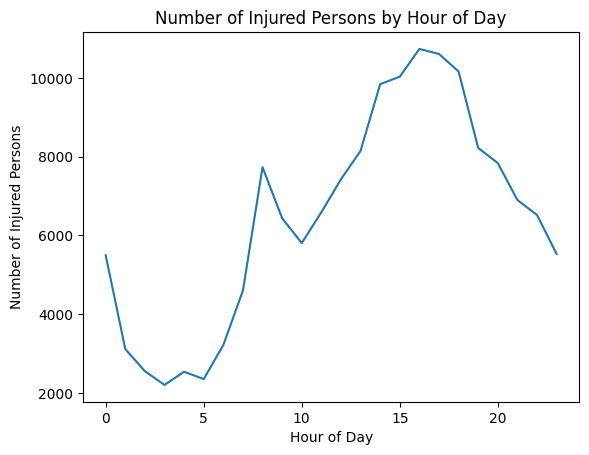

In [27]:
import matplotlib.pyplot as plt

# Group the data by hour of day and sum the number of injured persons
df_hourly = dfspecified.groupby(dfspecified['CRASH TIME'].dt.hour)['NUMBER OF PERSONS INJURED'].sum().reset_index()

# Create a line chart
plt.plot(df_hourly['CRASH TIME'], df_hourly['NUMBER OF PERSONS INJURED'])
plt.xlabel('Hour of Day')
plt.ylabel('Number of Injured Persons')
plt.title('Number of Injured Persons by Hour of Day')
plt.show()

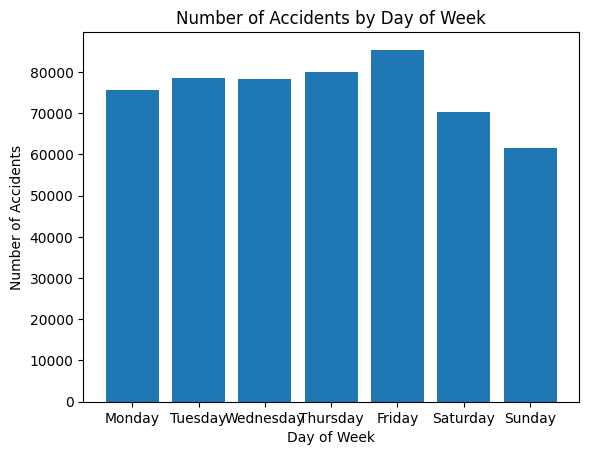

In [28]:
weekday_counts = dfspecified.groupby('DAY_OF_WEEK')['CRASH DATE'].count()

weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.bar(weekday_counts.index, weekday_counts.values)
plt.title('Number of Accidents by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.show()

In [29]:
# Group the data by ON STREET NAME and CROSS STREET NAME to find the number of accidents at each intersection
dangerous_intersections = dfspecified.groupby(['ON STREET NAME', 'CROSS STREET NAME']).size().reset_index(name='ACCIDENT_COUNT')

# Sort the intersections by the number of accidents in descending order
dangerous_intersections = dangerous_intersections.sort_values('ACCIDENT_COUNT', ascending=False)

# Display the top 10 most dangerous intersections
dangerous_intersections.head(10)


,ON STREET NAME,CROSS STREET NAME,ACCIDENT_COUNT
56888,TILLARY STREET,FLATBUSH AVENUE EXTENSION,464
36555,FLATBUSH AVENUE EXTENSION,TILLARY STREET,436
61681,WEST FORDHAM ROAD,MAJOR DEEGAN EXPRESSWAY,413
33848,EAST 59 STREET,2 AVENUE,320
26180,CANAL STREET,LAFAYETTE STREET,304
51428,QUEENS BOULEVARD,WOODHAVEN BOULEVARD,298
1189,11 AVENUE,WEST 40 STREET,286
48864,NORTHERN BOULEVARD,CROSS ISLAND PARKWAY,266
60969,WEST 41 STREET,10 AVENUE,262
60957,WEST 40 STREET,11 AVENUE,245


In [30]:
# Filter the dataset to only include intersection crashes
df_intersections = dfspecified[(dfspecified['ON STREET NAME'].notnull()) & (dfspecified['CROSS STREET NAME'].notnull())]

# Group the data by intersection and count the number of crashes at each intersection
df_intersection_counts = df_intersections.groupby(['ON STREET NAME', 'CROSS STREET NAME']).size().reset_index(name='Crash Count')

# Sort the intersections by the number of crashes to identify the most dangerous intersections
df_intersection_counts = df_intersection_counts.sort_values('Crash Count', ascending=False)

# Display the top 10 most dangerous intersections
print(df_intersection_counts.head(10))

# For each intersection, analyze the contributing factors to identify the main causes of crashes
for i, row in df_intersection_counts.head(10).iterrows():
    intersection = row['ON STREET NAME'] + ' and ' + row['CROSS STREET NAME']
    print('\nIntersection:', intersection)
    
    # Filter the data to only include crashes at this intersection
    df_intersection_crashes = df_intersections[(df_intersections['ON STREET NAME'] == row['ON STREET NAME']) & (df_intersections['CROSS STREET NAME'] == row['CROSS STREET NAME'])]
    
    # Group the crashes by contributing factor and count the number of crashes for each factor
    df_intersection_contributing_factors = df_intersection_crashes.groupby('CONTRIBUTING FACTOR VEHICLE 1').size().reset_index(name='Crash Count')
    
    # Sort the contributing factors by the number of crashes to identify the main causes of crashes at this intersection
    df_intersection_contributing_factors = df_intersection_contributing_factors.sort_values('Crash Count', ascending=False)
    
    # Display the top contributing factors for this intersection
    print('Top Contributing Factors:')
    print(df_intersection_contributing_factors.head(5))


                  ON STREET NAME          CROSS STREET NAME  Crash Count
56888             TILLARY STREET  FLATBUSH AVENUE EXTENSION          464
36555  FLATBUSH AVENUE EXTENSION             TILLARY STREET          436
61681          WEST FORDHAM ROAD    MAJOR DEEGAN EXPRESSWAY          413
33848             EAST 59 STREET                   2 AVENUE          320
26180               CANAL STREET           LAFAYETTE STREET          304
51428           QUEENS BOULEVARD        WOODHAVEN BOULEVARD          298
1189                   11 AVENUE             WEST 40 STREET          286
48864         NORTHERN BOULEVARD       CROSS ISLAND PARKWAY          266
60969             WEST 41 STREET                  10 AVENUE          262
60957             WEST 40 STREET                  11 AVENUE          245

Intersection: TILLARY STREET and FLATBUSH AVENUE EXTENSION
Top Contributing Factors:
     CONTRIBUTING FACTOR VEHICLE 1  Crash Count
5   Driver Inattention/Distraction           64
13             

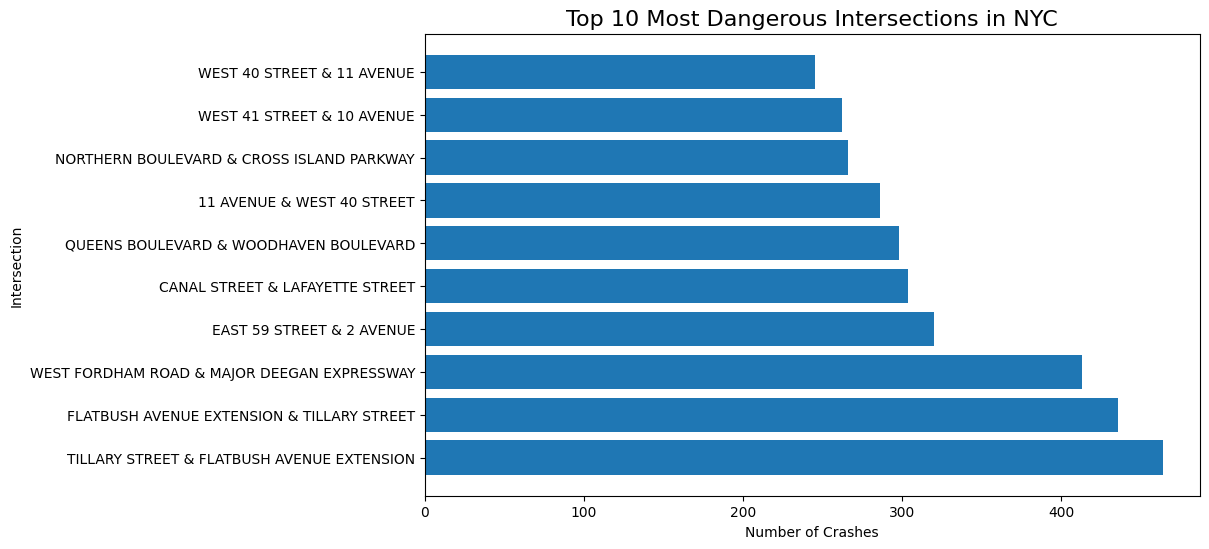

In [31]:
# Get the top 10 most dangerous intersections
top_10 = df_intersection_counts.head(10)

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(top_10['ON STREET NAME'] + ' & ' + top_10['CROSS STREET NAME'], top_10['Crash Count'])

# Set the title and labels
ax.set_title('Top 10 Most Dangerous Intersections in NYC', fontsize=16)
ax.set_xlabel('Number of Crashes')
ax.set_ylabel('Intersection')

# Display the chart
plt.show()

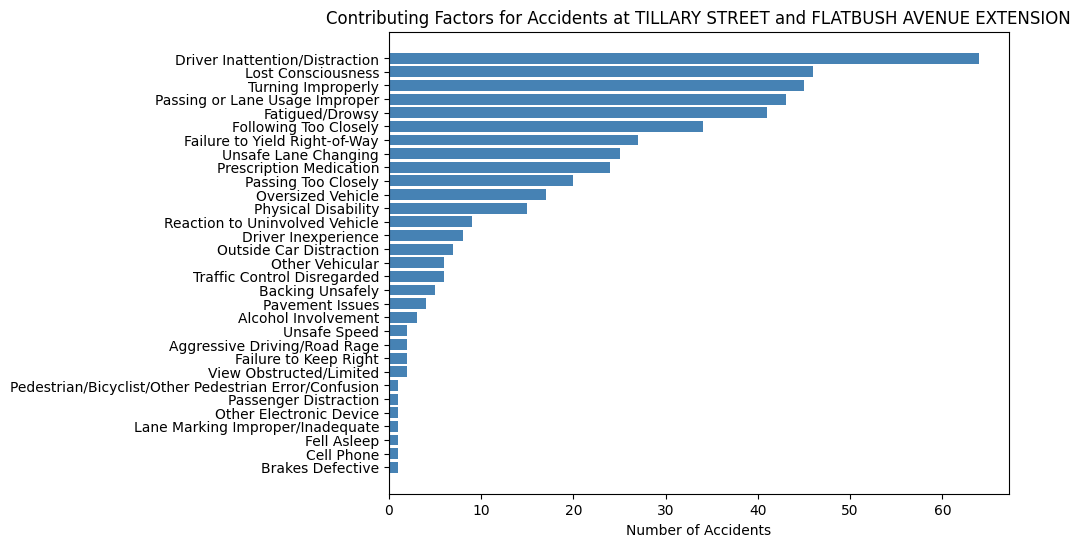

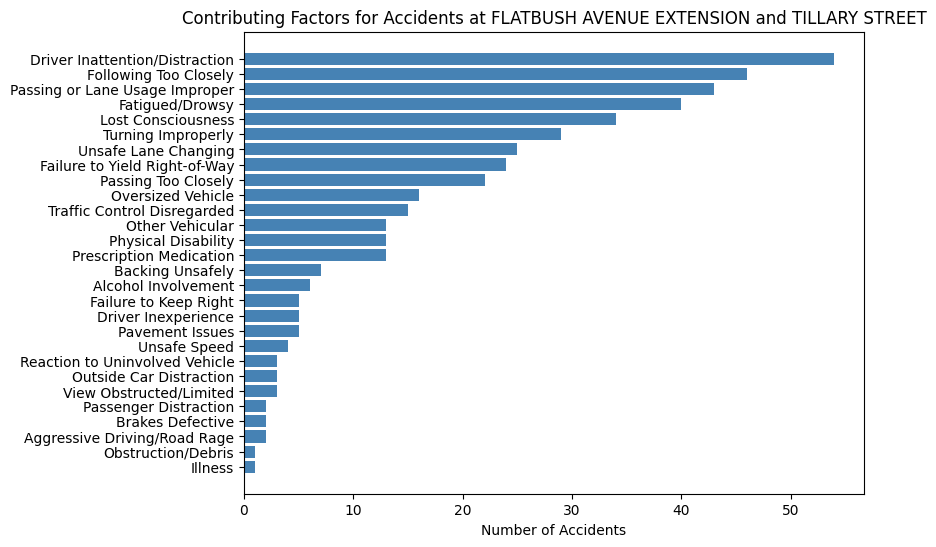

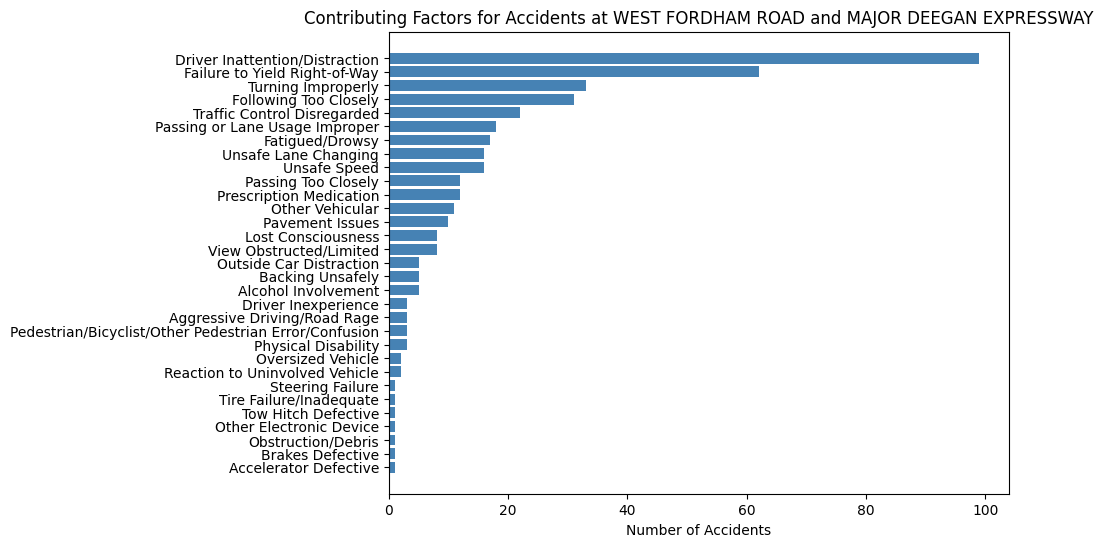

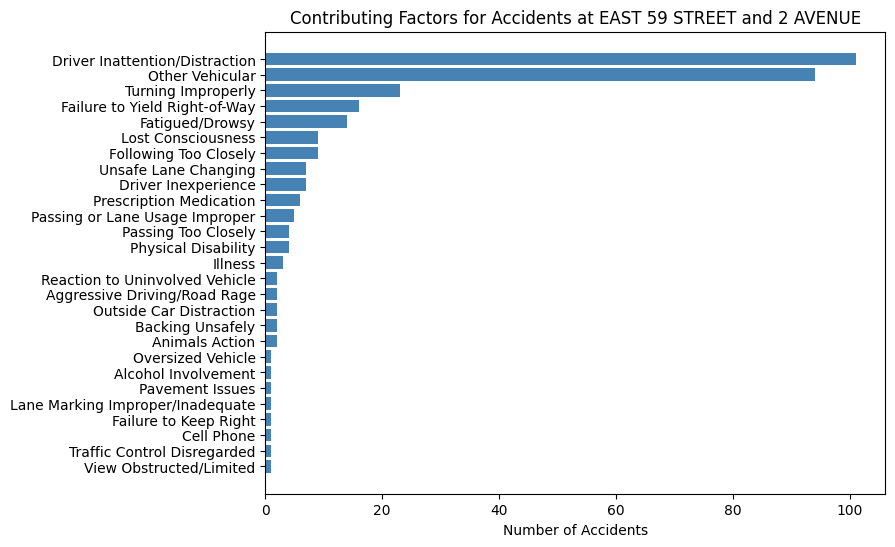

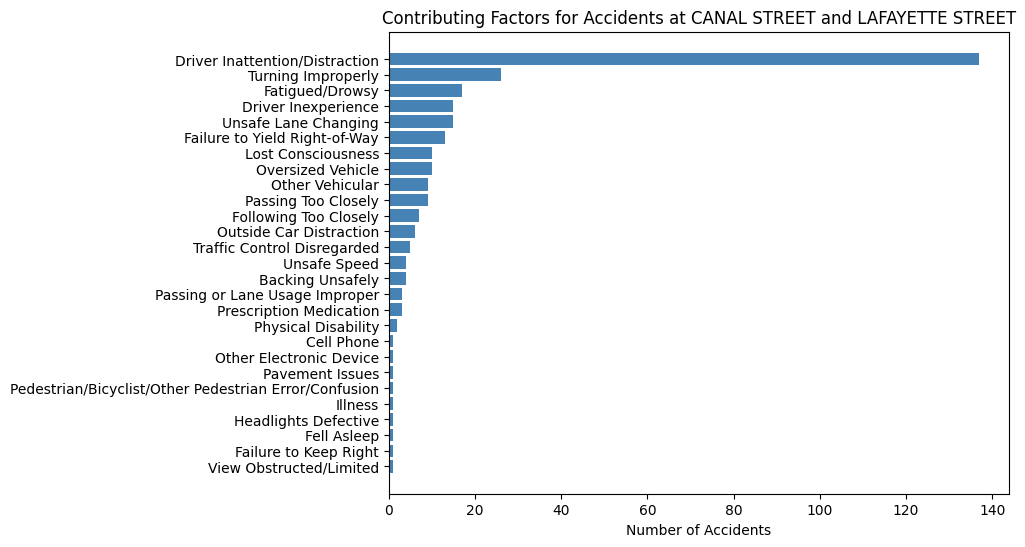

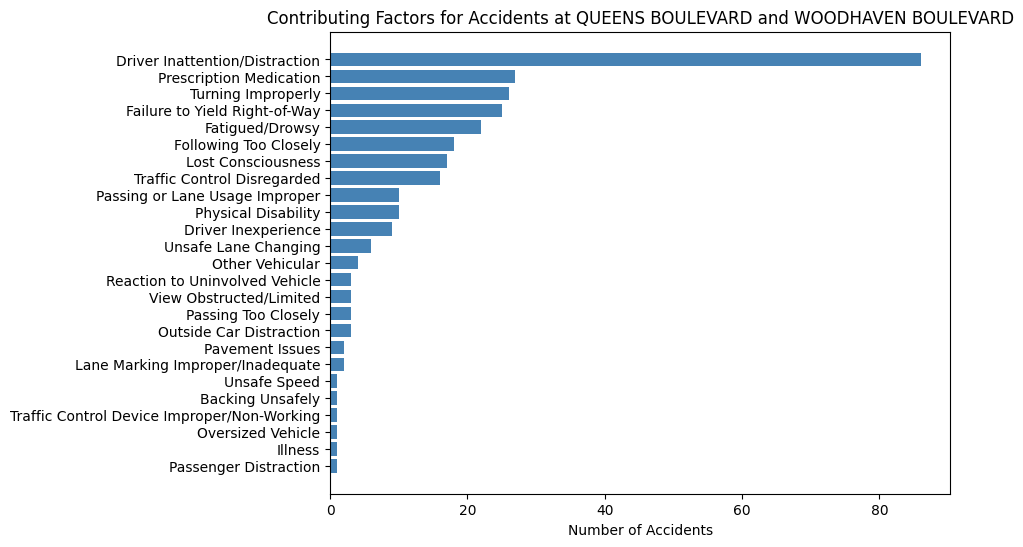

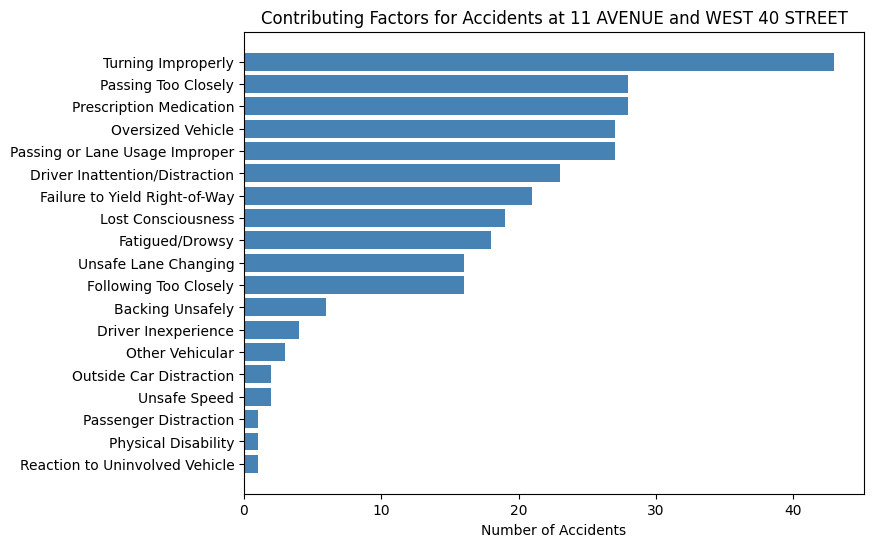

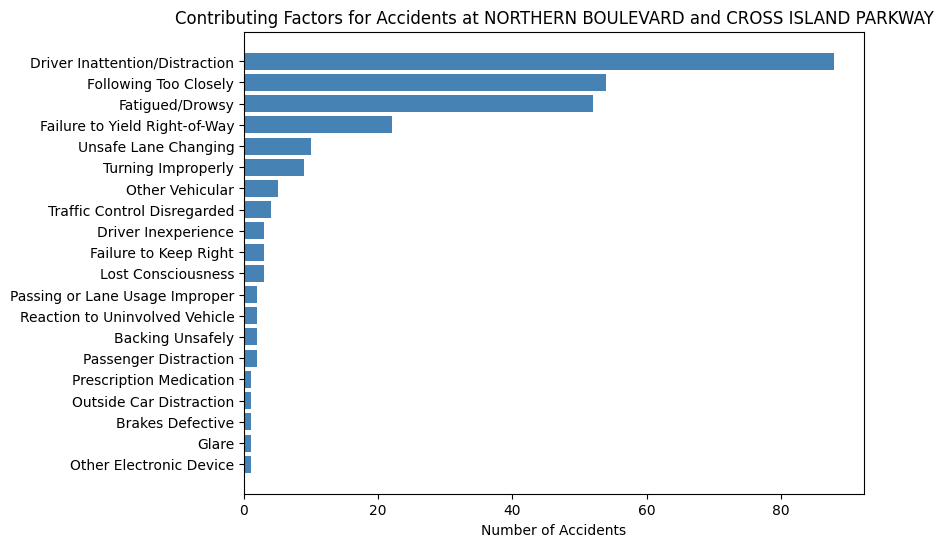

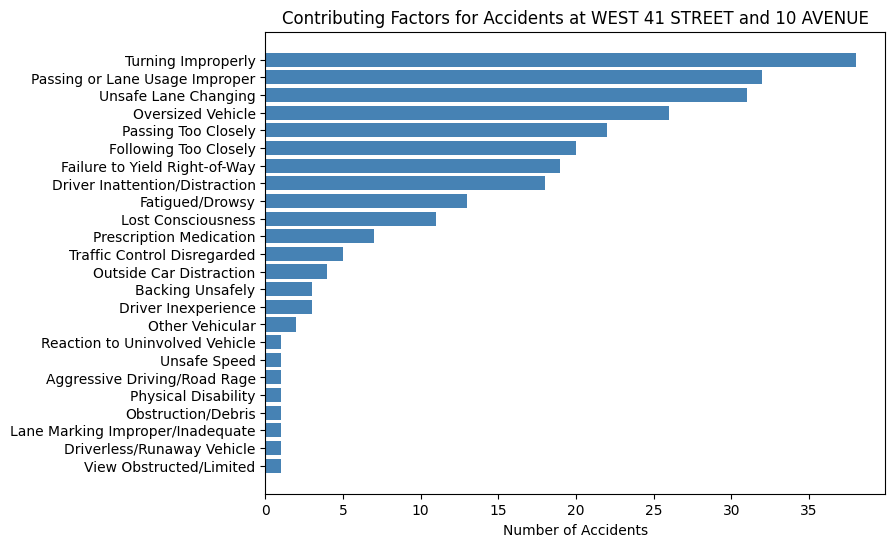

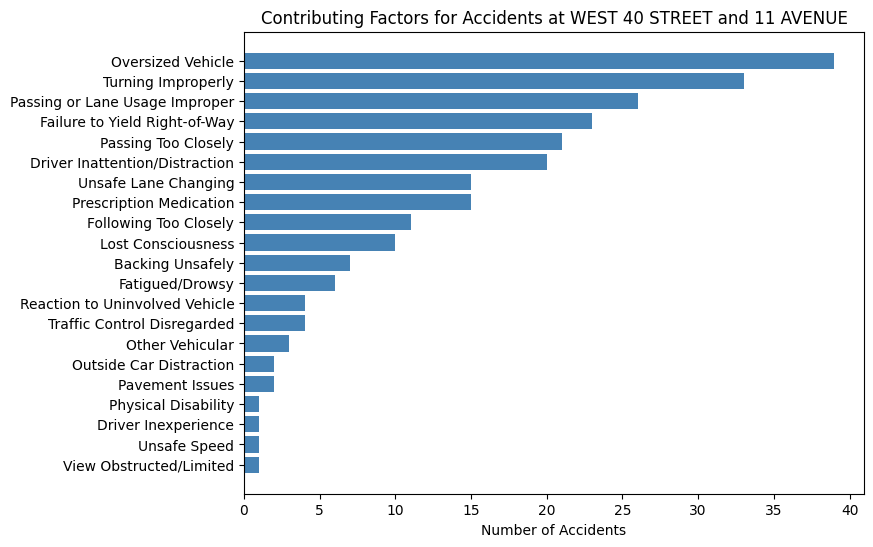

In [32]:
# Define a function to plot stacked horizontal bar chart for top 10 dangerous intersections
def plot_top_intersection(intersection_name):
    # Filter the data to include only the selected intersection
    df_intersection = df_intersections[(df_intersections['ON STREET NAME'] == intersection_name[0]) & (df_intersections['CROSS STREET NAME'] == intersection_name[1])]
    
    # Group the data by contributing factor and count the number of crashes caused by each factor
    df_factor_counts = df_intersection.groupby('CONTRIBUTING FACTOR VEHICLE 1').size().reset_index(name='Count')
    
    # Sort the contributing factors by count in descending order
    df_factor_counts = df_factor_counts.sort_values('Count', ascending=False)
    
    # Create a horizontal stacked bar chart
    fig, ax = plt.subplots(figsize=(8,6))
    y_pos = np.arange(len(df_factor_counts))
    ax.barh(y_pos, df_factor_counts['Count'], align='center', color='steelblue')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(df_factor_counts['CONTRIBUTING FACTOR VEHICLE 1'])
    ax.invert_yaxis()
    ax.set_xlabel('Number of Accidents')
    ax.set_title('Contributing Factors for Accidents at '+intersection_name[0]+' and '+intersection_name[1])
    plt.show()

# Loop through the top 10 intersections and plot a stacked bar chart for each intersection
for intersection in df_intersection_counts.head(10).itertuples(index=False):
    plot_top_intersection((intersection[0], intersection[1]))


In [33]:
# Filter the dataset to only include crashes with non-null vehicle types
df_vehicle_types = dfspecified[dfspecified['VEHICLE TYPE CODE 1'].notnull()]

# Group the data by vehicle type and count the number of crashes for each type
df_vehicle_counts = df_vehicle_types.groupby('VEHICLE TYPE CODE 1').size().reset_index(name='Crash Count')

# Sort the vehicle types by the number of crashes to identify which types are most commonly involved in accidents
df_vehicle_counts = df_vehicle_counts.sort_values('Crash Count', ascending=False)

# Display the top 10 most commonly involved vehicle types
print(df_vehicle_counts.head(10))


                     VEHICLE TYPE CODE 1  Crash Count
351                                Sedan       130666
262                    PASSENGER VEHICLE       120140
358  Station Wagon/Sport Utility Vehicle       101037
333        SPORT UTILITY / STATION WAGON        56653
365                                 TAXI        14713
387                                 Taxi        14552
428                                  VAN         9096
13                            4 dr sedan         8046
291                        Pick-up Truck         7984
51                             Box Truck         6133


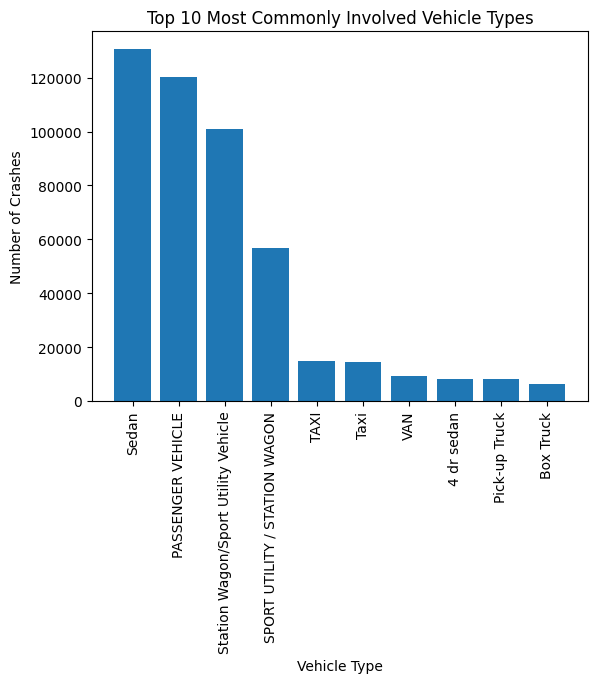

In [34]:
# Create a bar chart of the top 10 most commonly involved vehicle types
plt.bar(df_vehicle_counts['VEHICLE TYPE CODE 1'].head(10), df_vehicle_counts['Crash Count'].head(10))
plt.xticks(rotation=90)
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Crashes')
plt.title('Top 10 Most Commonly Involved Vehicle Types')
plt.show()


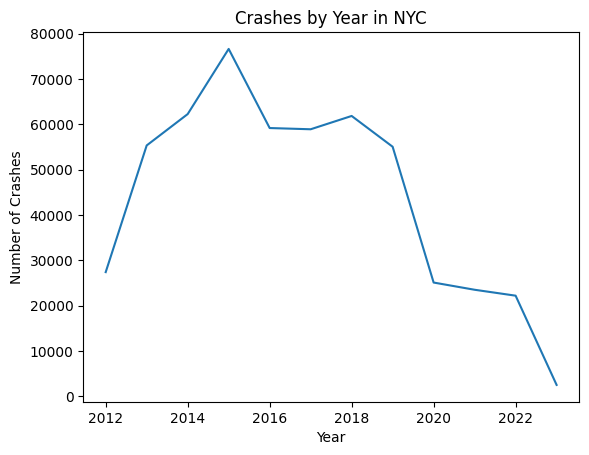

In [35]:
# Extract the year from the CRASH DATE column
dfspecified['Year'] = dfspecified['CRASH DATE'].dt.year

# Count the number of crashes per year
crashes_by_year = dfspecified.groupby('Year').size()

# Create a line graph showing the number of crashes per year
plt.plot(crashes_by_year.index, crashes_by_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.title('Crashes by Year in NYC')
plt.show()


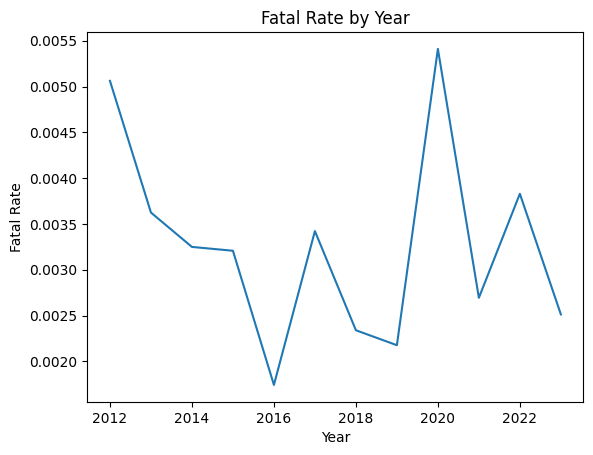

In [36]:
# Group the data by year and calculate the number of crashes and fatalities in each year
df_yearly = dfspecified.groupby(dfspecified['CRASH DATE'].dt.year)[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED']].sum().reset_index()

# Calculate the crash rate and injury rate for each year
df_yearly['Total Crashes'] = df_yearly['NUMBER OF PERSONS INJURED'] + df_yearly['NUMBER OF PERSONS KILLED']
df_yearly['Crash Rate'] = df_yearly['Total Crashes'] / dfspecified['CRASH DATE'].dt.year.value_counts().sort_index()
df_yearly['Injury Rate'] = df_yearly['NUMBER OF PERSONS INJURED'] / dfspecified['CRASH DATE'].dt.year.value_counts().sort_index()

# Calculate the fatal rate for each year
df_yearly['Fatal Rate'] = df_yearly['NUMBER OF PERSONS KILLED'] / df_yearly['Total Crashes']

# Plot the fatal rate by year
plt.plot(df_yearly['CRASH DATE'], df_yearly['Fatal Rate'])
plt.title('Fatal Rate by Year')
plt.xlabel('Year')
plt.ylabel('Fatal Rate')
plt.show()


**How has the implementation of Vision Zero policies in NYC affected the frequency and severity of car accidents, and what more can be done to improve road safety in the city?**

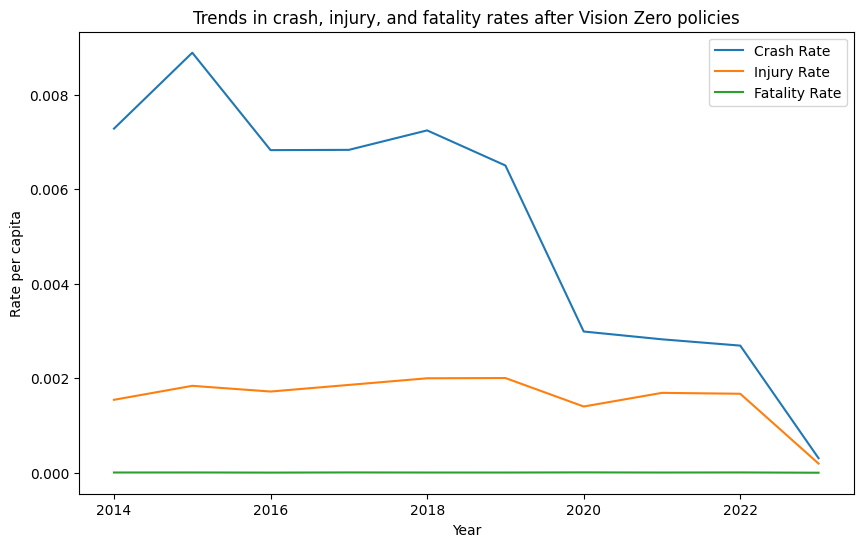

In [37]:
# Filter the dataset to only include crashes that occurred after the implementation of Vision Zero policies
df_vz = dfspecified[dfspecified['CRASH DATE'].dt.year >= 2014]

# Group the data by year and count the number of crashes, injuries, and fatalities for each year
df_vz_yearly = df_vz.groupby(df_vz['CRASH DATE'].dt.year)[['CRASH DATE']].count().rename(columns={'CRASH DATE': 'Crashes'})
df_vz_yearly['Injuries'] = df_vz.groupby(df_vz['CRASH DATE'].dt.year)[['NUMBER OF PERSONS INJURED']].sum()
df_vz_yearly['Fatalities'] = df_vz.groupby(df_vz['CRASH DATE'].dt.year)[['NUMBER OF PERSONS KILLED']].sum()

# Calculate the crash, injury, and fatality rates per capita for each year
population = [ 8550405, 8622698, 8669675, 8622698, 8537673, 8468181, 8398748, 8326699, 8253213, 8175133]
df_vz_yearly['Crash Rate'] = df_vz_yearly['Crashes'] / population
df_vz_yearly['Injury Rate'] = df_vz_yearly['Injuries'] / population
df_vz_yearly['Fatality Rate'] = df_vz_yearly['Fatalities'] / population

# Plot the trends for the crash, injury, and fatality rates over time
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_vz_yearly.index, df_vz_yearly['Crash Rate'], label='Crash Rate')
ax.plot(df_vz_yearly.index, df_vz_yearly['Injury Rate'], label='Injury Rate')
ax.plot(df_vz_yearly.index, df_vz_yearly['Fatality Rate'], label='Fatality Rate')
ax.set_xlabel('Year')
ax.set_ylabel('Rate per capita')
ax.set_title('Trends in crash, injury, and fatality rates after Vision Zero policies')
ax.legend()
plt.show()


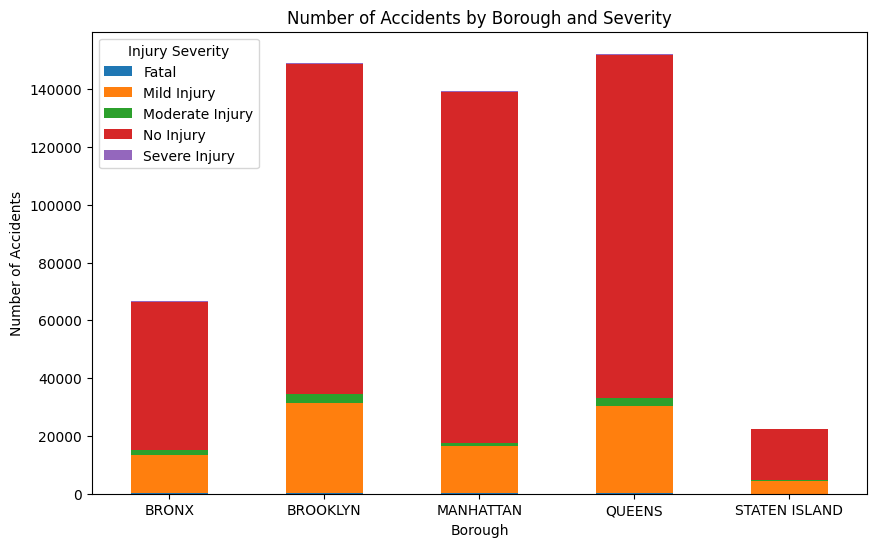

In [38]:
import matplotlib.pyplot as plt

# Group the data by borough and injury severity, and count the number of accidents in each group
grouped_data = dfspecified.groupby(['BOROUGH', 'INJURY_CATEGORY']).size().unstack()

# Create a bar chart
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set the title and axis labels
ax.set_title('Number of Accidents by Borough and Severity')
ax.set_xlabel('Borough')
ax.set_ylabel('Number of Accidents')

# Set the x-tick labels to the borough names
ax.set_xticklabels(grouped_data.index, rotation=0)

# Use different colors for each injury severity level
ax.legend(title='Injury Severity', loc='upper left')

plt.show()

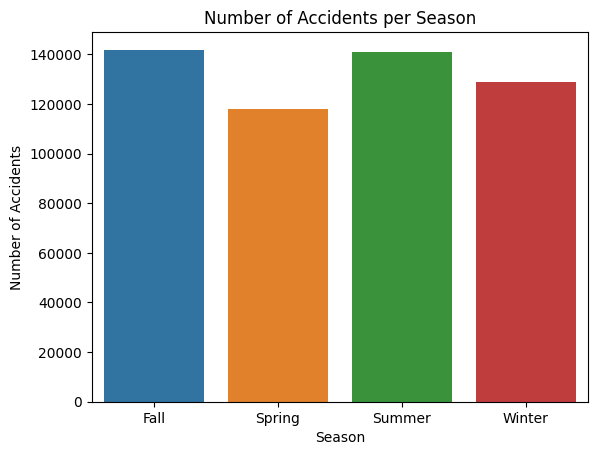

In [39]:
# Calculate the number of accidents per season
season_counts = dfspecified.groupby('SEASON')['SEASON'].count()

# Plot a bar graph
sns.barplot(x=season_counts.index, y=season_counts.values)

# Set the plot title and labels
plt.title('Number of Accidents per Season')
plt.xlabel('Season')
plt.ylabel('Number of Accidents')
plt.show()

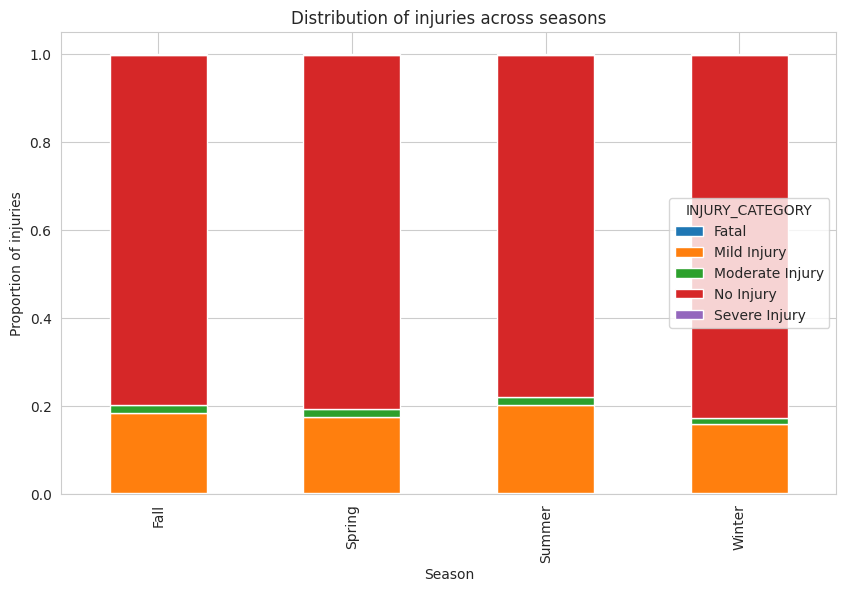

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by season and injury category
seasonal_injuries = dfspecified.groupby(['SEASON', 'INJURY_CATEGORY']).size().reset_index(name='count')

# Pivot the data to create a table with seasons as rows, injury categories as columns, and counts as values
seasonal_injuries_pivot = seasonal_injuries.pivot(index='SEASON', columns='INJURY_CATEGORY', values='count')

# Normalize the data by row (i.e., divide each row by the sum of its values)
seasonal_injuries_pivot_norm = seasonal_injuries_pivot.div(seasonal_injuries_pivot.sum(axis=1), axis=0)

# Plot the stacked bar chart
sns.set_style('whitegrid')
ax = seasonal_injuries_pivot_norm.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Season')
ax.set_ylabel('Proportion of injuries')
ax.set_title('Distribution of injuries across seasons')
plt.show()

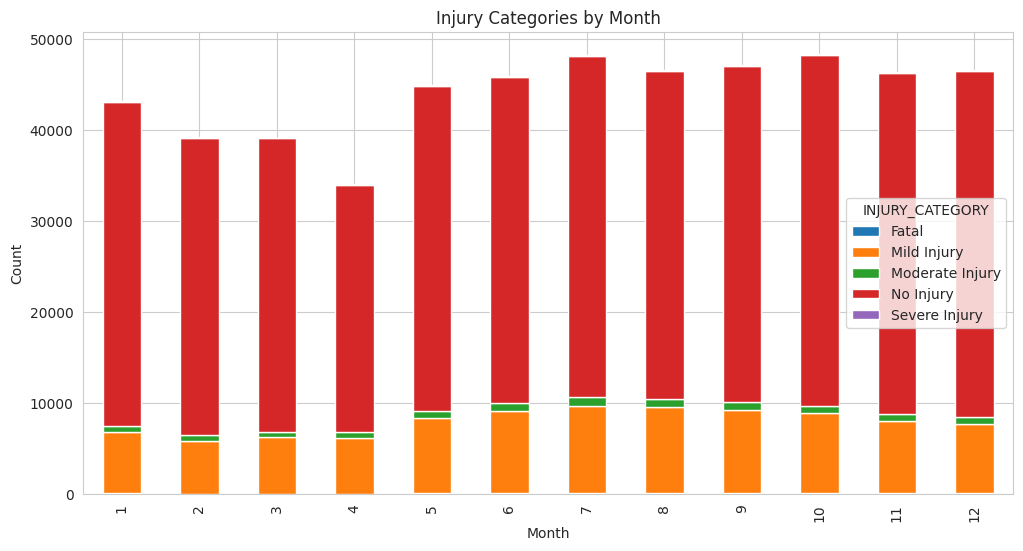

In [41]:
# Create a subset of the data with only the columns we need
dfspecified['MONTH'] = dfspecified['CRASH DATE'].dt.month

df_injury = dfspecified[['MONTH', 'INJURY_CATEGORY']]

# Group the data by month and injury category, and count the number of occurrences
df_injury_counts = df_injury.groupby(['MONTH', 'INJURY_CATEGORY']).size().reset_index(name='COUNTS')

# Pivot the data to create a matrix of injury category counts for each month
df_injury_pivot = df_injury_counts.pivot(index='MONTH', columns='INJURY_CATEGORY', values='COUNTS').fillna(0)

# Create the bar plot
sns.set_style("whitegrid")
ax = df_injury_pivot.plot(kind='bar', stacked=True, figsize=(12,6))
ax.set_title("Injury Categories by Month")
ax.set_xlabel("Month")
ax.set_ylabel("Count")
plt.show()


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Drop irrelevant columns
data = dfspecified[['BOROUGH', 'DAY_OF_WEEK', 'SECONDS_SINCE_MIDNIGHT', 'SEASON', 'ACCIDENT_COUNT', 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2','VEHICLE TYPE CODE 1','VEHICLE TYPE CODE 2','INJURY_CATEGORY']]

# Convert categorical columns to numerical using LabelEncoder
le = LabelEncoder()

data['CONTRIBUTING FACTOR VEHICLE 1'] = le.fit_transform(dfspecified['CONTRIBUTING FACTOR VEHICLE 1'])
data['CONTRIBUTING FACTOR VEHICLE 2'] = le.fit_transform(dfspecified['CONTRIBUTING FACTOR VEHICLE 2'])
data['VEHICLE TYPE CODE 1'] = le.fit_transform(dfspecified['VEHICLE TYPE CODE 1'])
data['VEHICLE TYPE CODE 2'] = le.fit_transform(dfspecified['VEHICLE TYPE CODE 2'])
data['BOROUGH'] = le.fit_transform(dfspecified['BOROUGH'])
data['SEASON'] = le.fit_transform(dfspecified['SEASON'])
data['DAY_OF_WEEK'] = le.fit_transform(dfspecified['DAY_OF_WEEK'])
data['INJURY_CATEGORY_ENCODED'] = le.fit_transform(data['INJURY_CATEGORY'])



In [47]:
# Split the data into train and test sets
X = data.drop(['INJURY_CATEGORY_ENCODED','INJURY_CATEGORY'], axis=1)
y = data['INJURY_CATEGORY_ENCODED']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
def model_performance_analysis(number, model, X_test, y_test):
    # Predict labels for test data
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean squared error: {mse}")
    
    # Generate the classification report
    report = classification_report(y_test, y_pred, zero_division=1)
    print(report)
    
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    # Create a new figure for the matrix
    plt.figure(i)

    # Plot the matrix
    plt.imshow(cm, cmap='Blues', interpolation='nearest')
    plt.title(f"Confusion Matrix")
    plt.colorbar()
    plt.xticks([0, 1, 2, 3, 4], ["No Injury", "Mild Injury", "Moderate Injury", "Severe Injury", "Fatal"])
    plt.yticks([0, 1, 2, 3, 4], ["No Injury", "Mild Injury", "Moderate Injury", "Severe Injury", "Fatal"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
    # Plot the confusion matrix
    #sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

DecisionTreeClassifier
Mean squared error: 1.0204351314361224
              precision    recall  f1-score   support

           0       0.01      0.01      0.01       152
           1       0.32      0.36      0.34     18921
           2       0.04      0.05      0.04      1752
           3       0.84      0.82      0.83     84835
           4       0.00      0.00      0.00       285

    accuracy                           0.72    105945
   macro avg       0.24      0.25      0.24    105945
weighted avg       0.73      0.72      0.72    105945

[[    2    52     7    90     1]
 [   74  6734   502 11531    80]
 [    9   430    80  1215    18]
 [  133 13539  1651 69230   282]
 [    0    53    12   220     0]]


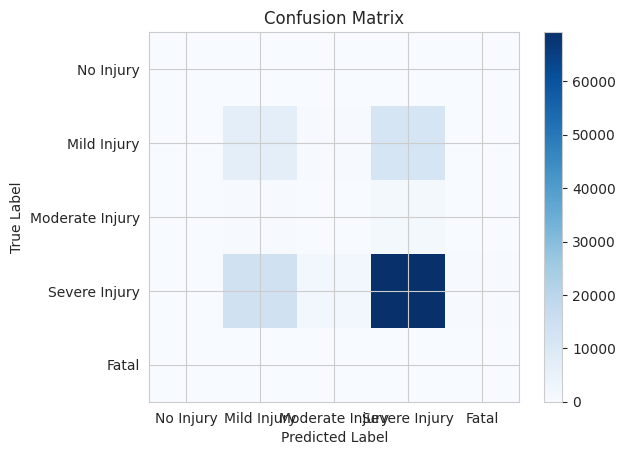

DecisionTreeClassifier Accuracy: 0.6910934489633926 +/- 0.040710035706274884
RandomForestClassifier
Mean squared error: 0.6691868422294587
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       152
           1       0.77      0.15      0.25     18921
           2       1.00      0.00      0.00      1752
           3       0.82      0.99      0.90     84835
           4       1.00      0.00      0.00       285

    accuracy                           0.82    105945
   macro avg       0.92      0.23      0.23    105945
weighted avg       0.82      0.82      0.76    105945

[[    0     9     0   143     0]
 [    0  2838     0 16083     0]
 [    0     9     0  1743     0]
 [    0   808     0 84027     0]
 [    0     0     0   285     0]]


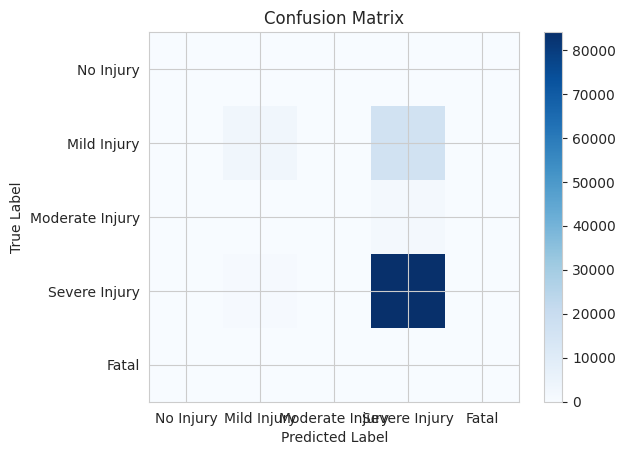

RandomForestClassifier Accuracy: 0.7982625528611874 +/- 0.03542981915633456
LogisticRegression
Mean squared error: 0.7465099815942234
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       152
           1       1.00      0.00      0.00     18921
           2       1.00      0.00      0.00      1752
           3       0.80      1.00      0.89     84835
           4       1.00      0.00      0.00       285

    accuracy                           0.80    105945
   macro avg       0.96      0.20      0.18    105945
weighted avg       0.84      0.80      0.71    105945

[[    0     0     0   152     0]
 [    0     0     0 18921     0]
 [    0     0     0  1752     0]
 [    0     0     0 84835     0]
 [    0     0     0   285     0]]


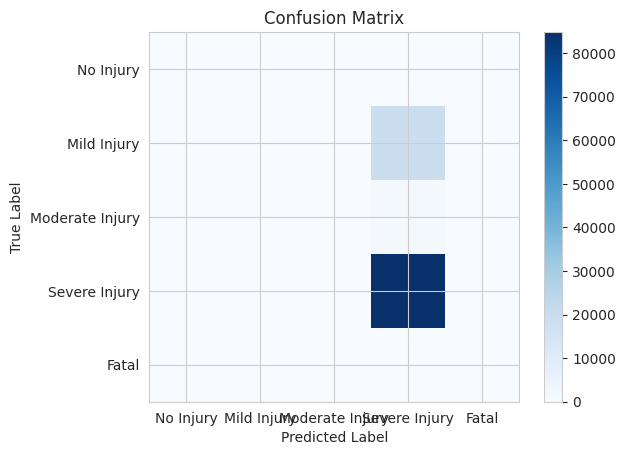

LogisticRegression Accuracy: 0.7933693881134591 +/- 0.012291974091235475
MLPClassifier
Mean squared error: 0.6698381235546746
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       152
           1       0.68      0.19      0.30     18921
           2       1.00      0.00      0.00      1752
           3       0.83      0.98      0.90     84835
           4       1.00      0.00      0.00       285

    accuracy                           0.82    105945
   macro avg       0.70      0.23      0.24    105945
weighted avg       0.80      0.82      0.77    105945

[[    0    36     0   116     0]
 [    1  3626     0 15294     0]
 [    0    44     0  1708     0]
 [    0  1656     0 83179     0]
 [    0     6     0   279     0]]


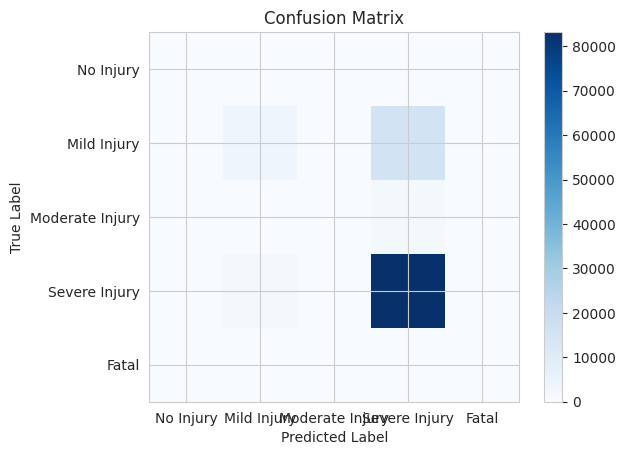

MLPClassifier Accuracy: 0.7993838293372898 +/- 0.0002205166426807715


In [ ]:
# Define the models to be evaluated
models = [
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    LogisticRegression(max_iter=10000),
    MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500, random_state=42)
]

# Perform cross-validation
i=0
for model in models:
    model.fit(X_train, y_train)
    print(f"{model.__class__.__name__}")
    model_performance_analysis(i,model, X_test, y_test)
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{model.__class__.__name__} Accuracy: {scores.mean()} +/- {scores.std()}")
    i=i+1